In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

Use `least_squares` to compute w, and visualize the results.

In [ ]:
from refik_lib.least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1 / (1 + np.exp(-t))

In [29]:
def calculate_loss(y, tx, w, penalized=False):
    """compute the cost by negative log likelihood."""
    sig = sigmoid(tx @ w)
    t1 = y * np.log(sig)
    t2 = (1 - y) * np.log(1 - sig)
    return -np.squeeze(np.sum(t1 + t2, axis=0))

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx @ w) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    w = w - gamma * gradient
    return loss, w

Demo!

In [ ]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [9]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    sig = sigmoid(tx @ w).flatten()
    S = np.diag(sig * (1 - sig))
    return tx.T @ S @ tx 

calculate_hessian(np.array([1,2,3]).reshape(3,-1), np.array([[1,3,5], [1,6,3], [1,3,3]]), np.array([0.4, 0.4,0.2]).reshape(3, -1))

array([[0.1854111 , 0.64999069, 0.68494989],
       [0.64999069, 2.51251649, 2.33612187],
       [0.68494989, 2.33612187, 2.69843265]])

Write a function below to return loss, gradient, and hessian.

In [10]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [18]:
def learning_by_newton_method(y, tx, w, lambda_):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w -= lambda_ * np.linalg.solve(hessian, gradient)
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=126.31098316846278
Current iteration=2, the loss=116.17884131836638
Current iteration=3, the loss=107.63603770167282
Current iteration=4, the loss=100.30205497477121
Current iteration=5, the loss=93.92045949357014
Current iteration=6, the loss=88.3106265888207
Current iteration=7, the loss=83.3406199799586
Current iteration=8, the loss=78.91107491445945
Current iteration=9, the loss=74.94517505459513
Current iteration=10, the loss=71.38217682387335
Current iteration=11, the loss=68.1730853775094
Current iteration=12, the loss=65.27768184568599
Current iteration=13, the loss=62.66242563531865
Current iteration=14, the loss=60.29893947109508
Current iteration=15, the loss=58.162892820633104
Current iteration=16, the loss=56.233164565608035
Current iteration=17, the loss=54.4912061318458
Current iteration=18, the loss=52.92055177744632
Current iteration=19, the loss=51.506439134014315
Current iteration=20, the 

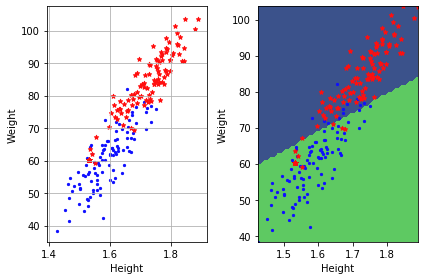

In [32]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, lambda_)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [33]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    w_norm2 = np.squeeze(w.T @ w)
    loss = calculate_loss(y, tx, w) + lambda_ * w_norm2
    gradient = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    hessian = calculate_hessian(y, tx, w) + lambda_ * np.identity(len(w))
    
    return loss, gradient, hessian

Here I am using the newton method eventhough we are doing the logistic regression. It converges much faster than the official solution. On the official solution they are using standard gradient descent.

In [36]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    
    # Updating w
    w -= np.linalg.solve(hessian, gradient)

    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)